In [2]:
import tensorflow as tf

In [3]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
               if(logs.get('accuracy')>0.998):
                   print("\nReached 60% accuracy so cancelling training!")
                   self.model.stop_training = True

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train, y_train),(x_test,y_test)= mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
x_train=x_train.reshape(60000,28,28,1)

In [7]:
x_test=x_test.reshape(10000,28,28,1)

In [8]:
x_train=x_train/255.0

In [9]:
x_test=x_test/255.0

In [10]:
callbacks=myCallback()

In [11]:
model=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,input_shape = (28,28,1)),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(128,activation=tf.nn.relu),
                           tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [13]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(x_train,y_train,epochs=20,callbacks=[callbacks])

Epoch 1/20
1875/1875 [==============================] - 82s 44ms/step - loss: 0.1197 - accuracy: 0.9638
Epoch 2/20
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0384 - accuracy: 0.9880
Epoch 3/20
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0267 - accuracy: 0.9913
Epoch 4/20
1875/1875 [==============================] - 82s 43ms/step - loss: 0.0183 - accuracy: 0.9943
Epoch 5/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0140 - accuracy: 0.9955
Epoch 6/20
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0124 - accuracy: 0.9959
Epoch 7/20
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0092 - accuracy: 0.9970
Epoch 8/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0086 - accuracy: 0.9973
Epoch 9/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0079 - accuracy: 0.9975
Epoch 10/20
1874/1875 [============================>.] - ETA: 0s

In [15]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.0333 - accuracy: 0.9915


[0.03333502635359764, 0.9915000200271606]

In [40]:
#Visualizing convolution process

In [41]:
print(y_test[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


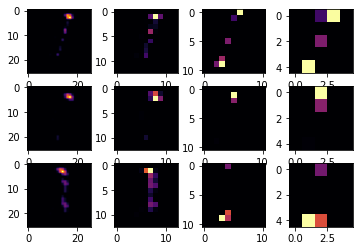

In [52]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=2
SECOND_IMAGE=5
THIRD_IMAGE=14
CONVOLUTION_NUMBER = 3
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)